# **CNOT logic**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
c = QuantumRegister(1, name='c')
r1 = ClassicalRegister(1, name='r1')
r2 = ClassicalRegister(2, name='r2')
r3 = ClassicalRegister(3, name='r3')
qc = QuantumCircuit(a, b, c, r1, r2, r3)

In [4]:
## initialization
qc.reset(c)
qc.x(c)
qc.measure(c, r1)
qc.barrier()

In [5]:
qc.reset(b)
qc.reset(c)
qc.x(b)
qc.cx(b, c)
qc.measure(b, r2[0])
qc.measure(c, r2[1])
qc.barrier()

In [6]:
qc.reset(a)
qc.reset(b)
qc.reset(c)
qc.x(a)
qc.x(b)
qc.ccx(a, b, c)
qc.measure(a, r3[0])
qc.measure(b, r3[1])
qc.measure(c, r3[2])

In [7]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

In [8]:
counts = result.get_counts(qc)
print('counts:',counts)

counts: {'111 11 1': 1}


|7> (1-0j)


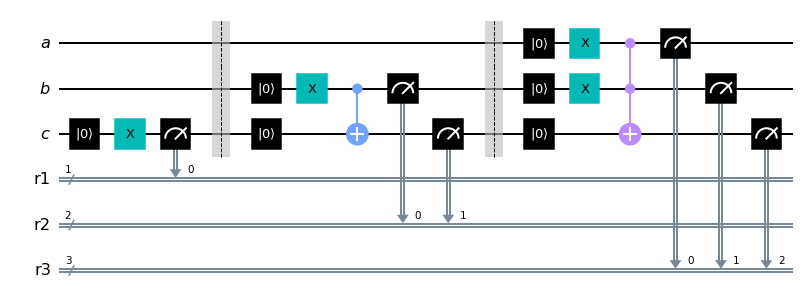

In [9]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        print('|{}> {}'.format(i, amp))
qc.draw()        # draw the circuit